# LeNet - 5

https://stackoverflow.com/questions/28525436/why-the-lenet5-uses-32%C3%9732-image-as-input

http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

<img src="https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png">

https://world4jason.gitbooks.io/research-log/content/deepLearning/CNN/img/lenet.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import random

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
input_dim = mnist.train.images[0].shape[0]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(init_random_dist)

In [4]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [5]:
def conv2d(x, W):
    #x -> [batch, H, W, Channels]
    #W -> [filter H, filter W, Channels IN, Channels Out]
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding='VALID')

In [6]:
def avg_pool_2by2(x):
    #x -> [batch, H, W, Channels]
    return tf.nn.avg_pool(x, ksize=[1, 2, 2, 1], strides = [1,2,2,1], padding='SAME')

In [7]:
def convolutional_layer(input_x, shape):
    #shape = [W, H, CH_IN, CH_OUT]
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W)+b)

In [8]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.nn.relu(tf.matmul(input_layer, W) + b)

In [9]:
COLOR_CHANNELS = 1
# placeholders
x = tf.placeholder(tf.float32, shape=[None, 28**2])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
learning_rate = tf.placeholder('float', [])

In [10]:
COLOR_CHANNELS = 1
x_image = tf.reshape(x, [-1, 28, 28, COLOR_CHANNELS])
print(x_image.shape)
x_image = tf.pad(x_image, tf.constant([[0,0], [2,2],[2,2], [0,0]]), 'CONSTANT')
print(x_image.shape)

(?, 28, 28, 1)
(?, 32, 32, 1)


In [11]:
hl1 = convolutional_layer(x_image, shape=[5, 5, COLOR_CHANNELS, 6])
print(hl1.shape)
hl2 = avg_pool_2by2(hl1)
print(hl2.shape)
hl3 = convolutional_layer(hl2, shape=[5, 5, 6, 16])
print(hl3.shape)
hl4 = avg_pool_2by2(hl3)
print(hl4.shape)
flat_layer = tf.reshape(hl4, [-1, 5*5*16])
print(flat_layer.shape)
hl5 = normal_full_layer(flat_layer, 120)
print(hl5.shape)
hl6 = normal_full_layer(hl5, 84)
print(hl6.shape)
hl7 = normal_full_layer(hl6, 10)
print(hl7.shape)
ol = tf.nn.softmax(hl7)
print(ol.shape)

(?, 28, 28, 6)
(?, 14, 14, 6)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 400)
(?, 120)
(?, 84)
(?, 10)
(?, 10)


In [12]:
loss = tf.reduce_mean((ol - y_ )**2)
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [13]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [14]:
from IPython.display import clear_output

steps = 30000
rate = 3e-3
plot_accuracy = []
plot_loss = []

with tf.Session() as  sess:
    sess.run(init)
    for i in range(steps):
        batch_x, batch_y = mnist.train.next_batch(50)
        sess.run(train, feed_dict = {x:batch_x, y_:batch_y, learning_rate:rate})
        
        if i%100 == 0:
            clear_output()
            matches = tf.equal(tf.argmax(ol, 1), tf.argmax(y_, 1))
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))
            print_accuracy = sess.run(acc, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
            print_loss = sess.run(loss, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
            plot_accuracy.append(print_accuracy)
            plot_loss.append(print_loss)
            print('ON STEP: {}, ACURRACY: {}, LOSS: {}'. format(i, print_accuracy, print_loss))
            clear_output(wait=True)

ON STEP: 29900, ACURRACY: 0.9803001284599304, LOSS: 0.012236680835485458


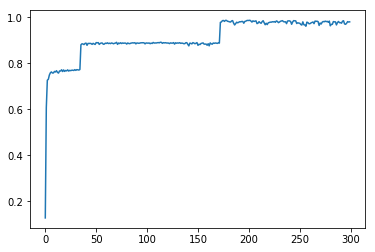

In [15]:
%matplotlib inline
plt.plot(plot_accuracy)

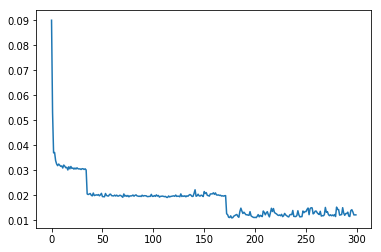

In [16]:
plt.plot(plot_loss)